In [4]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_circles, make_moons
from sklearn.model_selection import train_test_split

import keras
from keras import Model, Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.callbacks import LambdaCallback

In [47]:
## CONFIG
n_samples = 1000
test_size = 0.1
lr = 0.01
epochs = 30

# Grid
GRID_X_START = -1.5
GRID_X_END = 3
GRID_Y_START = -1.5
GRID_Y_END = 1.5

In [48]:
X, y = make_moons(n_samples = n_samples, shuffle = True, noise = 0.2, random_state = 42)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = 21)

In [50]:
assert(X_train.shape[1] == X_test.shape[1])

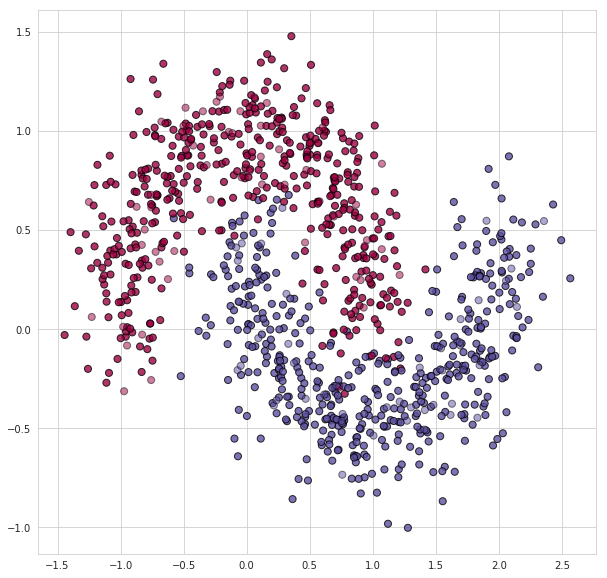

In [51]:
plt.figure(figsize = (10, 10))
sns.set_style('whitegrid')
plt.scatter(x = X_train[:, 0], y = X_train[:, 1], c = y_train.ravel(), s = 50, cmap = plt.cm.Spectral, edgecolors = 'black', alpha = 0.8)
plt.scatter(x = X_test[:, 0], y = X_test[:, 1], c = y_test.ravel(), s = 50, cmap = plt.cm.Spectral, edgecolors = 'black', alpha = 0.5)

### Definition of grid boundaries and storage of loss and acc history

In [52]:
grid[1]

array([[-1.5       , -1.46969697, -1.43939394, ...,  1.43939394,
         1.46969697,  1.5       ],
       [-1.5       , -1.46969697, -1.43939394, ...,  1.43939394,
         1.46969697,  1.5       ],
       [-1.5       , -1.46969697, -1.43939394, ...,  1.43939394,
         1.46969697,  1.5       ],
       ...,
       [-1.5       , -1.46969697, -1.43939394, ...,  1.43939394,
         1.46969697,  1.5       ],
       [-1.5       , -1.46969697, -1.43939394, ...,  1.43939394,
         1.46969697,  1.5       ],
       [-1.5       , -1.46969697, -1.43939394, ...,  1.43939394,
         1.46969697,  1.5       ]])

In [53]:
grid = np.mgrid[GRID_X_START:GRID_X_END:100j, GRID_Y_START:GRID_Y_END:100j]          ##IMP
grid_2d = grid.reshape((2, -1)).T
X, Y = grid
acc_history, loss_history = [], []
val_acc_history, val_loss_history = [], []

### Utility function

In [54]:
def makeIndexOfLength(index, length):
    str_index = str(index)
    return '0' * (length - len(str_index)) + str_index

In [55]:
# the auxiliary function forming graphs of classification boundaries and change of accuracy
def save_model_prediction_graph(epoch, logs):
    prediction_probs = model.predict_proba(grid_2d, batch_size = 32, verbose = 0)
    plt.figure(figsize = (10, 10))
    sns.set_style("whitegrid")
    plt.title('Binary classification with KERAS - epoch: ' + makeIndexOfLength(epoch, 3), fontsize=20)
    plt.xlabel('X', fontsize=15)
    plt.ylabel('Y', fontsize=15)
    plt.contourf(X, Y, prediction_probs.reshape(100, 100), alpha = 0.7, cmap = plt.cm.Spectral)        ##IMP
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train.ravel(), s=50, cmap=plt.cm.Spectral, edgecolors='black')
    plt.savefig("keras" + makeIndexOfLength(epoch, 3) + ".png")
    plt.close()
    
    acc_history.append(logs['acc'])
    loss_history.append(logs['loss'])
    val_acc_history.append(logs['val_acc'])
    val_loss_history.append(logs['val_loss'])
    plt.figure(figsize = (12, 8))
    sns.set_style("whitegrid")
    plt.plot(acc_history)
    plt.plot(loss_history)
    plt.plot(val_acc_history)
    plt.plot(val_loss_history)
    plt.title('Model accuracy and loss - epoch: ' + makeIndexOfLength(epoch, 3), fontsize=20)
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.xlim([0, epochs])
    plt.legend(['accuracy', 'loss', 'val accuracy', 'val loss'], loc='upper left')
    plt.savefig("loss_acc_" + makeIndexOfLength(epoch, 3) + ".jpeg")
    plt.close()

### Model

In [56]:
# Creating a KERAS model
model = Sequential()
model.add(Dense(4, input_dim=2,activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [57]:
# Adding callback functions that they will run in every epoch
testmodelcb = LambdaCallback(on_epoch_end = save_model_prediction_graph)

In [58]:
model.compile(loss='binary_crossentropy', optimizer='adamax', metrics=['accuracy'])

In [59]:
history = model.fit(X_train, y_train, epochs = epochs, validation_data = (X_test, y_test), verbose = 0, callbacks = [testmodelcb])
score = model.evaluate(X_test, y_test, verbose = 0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.3084793448448181
Test accuracy: 0.89


In [62]:
!convert -delay 10 -loop 0 *.png keras_class_coundaries.gif

convert: unable to open image `*.png': No such file or directory @ error/blob.c/OpenBlob/2712.
convert: no images defined `keras_class_coundaries.gif' @ error/convert.c/ConvertImageCommand/3210.


In [61]:
!convert -delay 10 -loop 0 *.jpeg keras_class_acc_loss.gif